In [3]:
# import necessary library
import pandas as pd # Pandas for data manipulation and analysis using tables (DataFrames)
import numpy as np # Numpy for numerical computing and efficient array operations.
import matplotlib.pyplot as plt #matplotlib.pyplot: Used to create a wide range of basic visualizations
import seaborn as sns # seaborn: Advance visualizations for statistics.
import warnings as wr
wr.filterwarnings("ignore") # warnings: To handle unnecessary warnings

In [4]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Din islam\Downloads\diabetics-prediction-\diabetes.csv")

In [ ]:
# Here, my dataset is in csv format. So, I used read_csv() function to  load the dataset

In [6]:
# To see the first 5 row from the dataset
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Checking the shape of the dataset to see how many rows and columns in the dataset
df.shape

(768, 9)

#### In this, dataset there are 768 rows and 9 columns

# - Data Preprocessing & Cleaning


In [7]:
### To know the overall information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Here, in the dataset , there is no missing value at any feature and not categorical feature.

In [8]:
#Checking null value Present or not by using pandas
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### df.isnull().sum() shows how many null value present in each feature

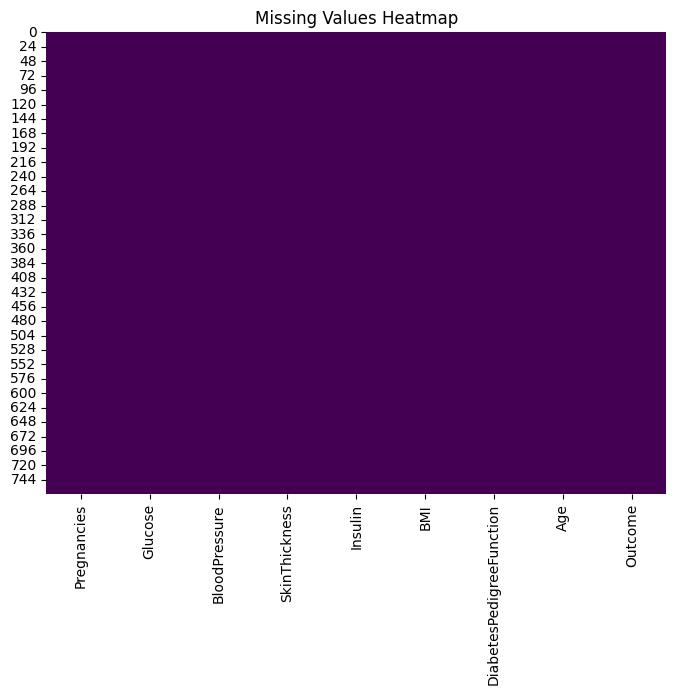

In [13]:
# visualize the null value by using heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


In [14]:
print("From the heatmap , we can clearly see that , there is no null value in the dataset")

From the heatmap , we can clearly see that , there is no null value in the dataset


In [15]:
# Checking duplicates 
df.duplicated().sum()

np.int64(0)

## In this dataset, there is no duplicate value.

In [16]:
# View data types of all columns
print(df.dtypes)


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


# Exploratory Data Analysis

In [17]:
# Checking Pregnancies column insight and visualize
df["Pregnancies"].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64

In [21]:
# To see the how many unique value in pregnancies column
df.Pregnancies.nunique()

17

In [20]:
# To see the unique value of the pregnancies columns
df.Pregnancies.unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [26]:
df.groupby('Outcome')['Pregnancies'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,3.298000,3.017185,0.0,1.00,2.0,5.0,13.0
1,268.0,4.865672,3.741239,0.0,1.75,4.0,8.0,17.0


### By describing the pregnancies feature, I can say that, here 500 people who does not have diabetes and there min pregnancy 0 and maximum pregnancies 13.
### And 268 people have diabetes and their minimum pregnancies 0 and maximum 17


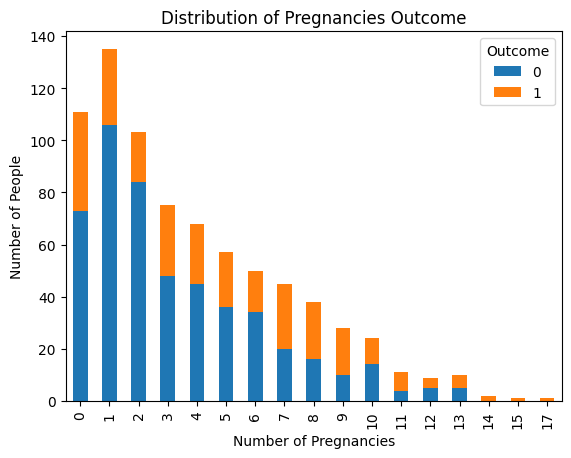

In [ ]:
# Visulize the Pregnancies feature with Outcome by Stack bar plot
pd.crosstab(df['Pregnancies'], df['Outcome']).plot(kind='bar', stacked=True)
plt.xlabel('Number of Pregnancies')
plt.ylabel('Number of People')
plt.title('Distribution of Pregnancies Outcome')
plt.legend(title='Outcome')
plt.show()


### From the Stack Bar plot , I can understand that, in pregnancies 0,1,2 , there are less diabetes tendency,
### As Pregnancies increases, diabetes also stat increasing.
### When pregnancies is 7 - 9, number of diabetes patient is maximum. 
### So, I can wrap up to say that, more pregnancies causes more diabetes.

In [31]:
# Checking impact of glucose in diabetes
df.groupby('Outcome')['Glucose'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,109.980000,26.141200,0.0,93.0,107.0,125.0,197.0
1,268.0,141.257463,31.939622,0.0,119.0,140.0,167.0,199.0


### In the description of Glucose and outcome, it can say that the non-diabetes people have average glocuse is 109.98 , minimum 0 and maximum 197.
### And the diabetes people have average glocuse 141.25 , minimum 0 and maximum 199.


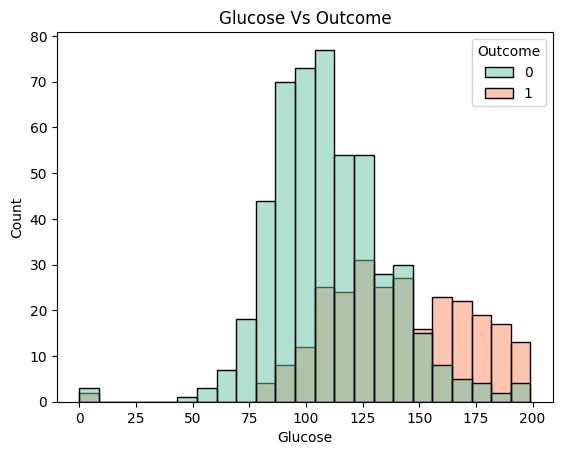

In [ ]:
# Visualize the Glocuse and Outcome by histplot
sns.histplot(data=df,x='Glucose',hue='Outcome',palette='Set2')
plt.title("Glucose Vs Outcome")
plt.show()

### From the hisplot, it's clearly seen that , the person who have glucose level is more than 150, are affected to diabetes.

In [34]:
# Checking the impact of BloodPressure,SkinThickness,Insulin in diabetes
bsi_des = ['BloodPressure', 'SkinThickness', 'Insulin']
for i in bsi_des:
    print(f"\nDescriptive stats for {i} by Outcome:")
    print(df.groupby('Outcome')[i].describe())


Descriptive stats for BloodPressure by Outcome:
         count       mean        std  min   25%   50%   75%    max
Outcome                                                           
0        500.0  68.184000  18.063075  0.0  62.0  70.0  78.0  122.0
1        268.0  70.824627  21.491812  0.0  66.0  74.0  82.0  114.0

Descriptive stats for SkinThickness by Outcome:
         count       mean        std  min  25%   50%   75%   max
Outcome                                                         
0        500.0  19.664000  14.889947  0.0  0.0  21.0  31.0  60.0
1        268.0  22.164179  17.679711  0.0  0.0  27.0  36.0  99.0

Descriptive stats for Insulin by Outcome:
         count        mean         std  min  25%   50%     75%    max
Outcome                                                              
0        500.0   68.792000   98.865289  0.0  0.0  39.0  105.00  744.0
1        268.0  100.335821  138.689125  0.0  0.0   0.0  167.25  846.0


### The diabetes person have average 70.82mmHg bloodPressure with standard deviation 21.49 also maximum 114 and minimum 0 and the non diabetes person have average 68 mmHg bloodPressure with standard deviation 18.06 and maximum 122 and minumum 0.
### The diabetes person's mean thickness is 22.16 with minimum thickness 0 and maximum thickness 99 also standard deviation 17.67 . On the other hand, the non-diabetes person mean thickness is 19.66 with  std 14.88 and minimum thickness is 0 and maximum 60.
### In the Insulin feature, for non-diabetes person , mean insulin is 68.79 , std 98.86 , with maximum 774. Diabetes person's have mean 100.33 , std 138.68 , and maximum insulin 846.
## That means in diabetes , the features have enough impact.